# Distributions
> A brief introduction to distributions in statistics.

- toc: true 
- badges: true
- comments: true
- categories: [Statistics, EDA]

In this blog, we will discuss all about distributions from Data Science & EDA perspective. We will be using "diamonds" dataset from seaborn library. 

In [3]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Dataset & basic EDA

Every dataset consists of samples (or records) and for every sample we record multiple features. Here, every sample is a diamond & for every diamond we have recorded *carat, cut, color, clarity, depth, table, price, x, y & z* features as we can see in the table above.

Its a good practice to check the shape of the dataset, missing values & unique values, even before we start the exploration process.

In [4]:
data.shape

(53940, 10)

Wow! we have a lot of data . . . 

In [5]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

We don't have any missing values. This is good news.

Now lets look at unique values . . .

In [6]:
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

A feature can be either *categorical* or *continuous*.

- **Categorical Features**: Finite & Distinct values. Here, `cut`, `color` and `clarity` are categorical features.
- **Continuous Features**: Infinite & continuous values.

Its extremely important to identify your categorical & continuous features because they require different treatment when it comes to analysis & pre-processing. 

## Frequency Table

Now that we know our categorical & continuous features, lets start the exploration . . . we will start with `cut` feature

In [7]:
data.cut.values

['Ideal', 'Premium', 'Good', 'Premium', 'Good', ..., 'Ideal', 'Good', 'Very Good', 'Premium', 'Ideal']
Length: 53940
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

There are 53940 values in total & 5 unique values. But this is not very useful. So lets create a **frequency table** out of it

In [8]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Now we can clearly see how many diamonds we have for each possible value of *cut*. This is much better than randomly throwing a list of ~54K values at someone. 

Similarly, lets explore other columns . . .

In [9]:
data.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [10]:
data.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

So far, we have very few unique values. And still we are not able to make such sense out of these *frequency tables*. Imagine, if we have a lot of unique values then it will quickly become unmanageable.

## Bar Plot

Remember, humans are visual creatures. So lets create a *bar plot* describing above table.

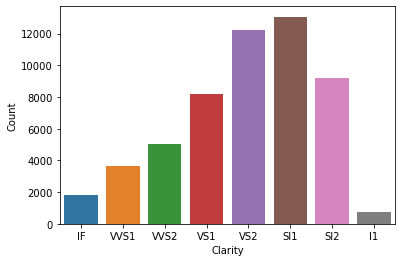

In [11]:
tmp = data.clarity.value_counts()
p = sns.barplot(x=tmp.index, y=tmp.values)
p.set(xlabel='Clarity', ylabel='Count');

Again, this is much better. We can clearly see people prefer *VS2* & *SI1* over other category of *clarity*.

Using these three things (data, frequency table, & bar plot) we can answer a lot of interesting question about our data. For example:
- What is most & least frequent category?
- How many more people bought *VS2* compared to *VS1*? 

Things get really interesting once you start repeating the same process for other categorical features as well. Not just other categories, you can also repeat the process for any subset of data.

## Comparing Bar plots

Say We want to see how *clarity* changes for *Ideal* cut of diamonds

In [12]:
ideal = data[data.cut == "Ideal"]
ideal.shape

(21551, 10)

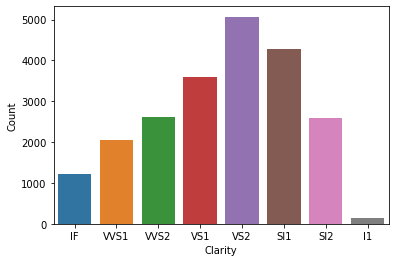

In [13]:
tmp = ideal.clarity.value_counts()
p = sns.barplot(x=tmp.index, y=tmp.values)
p.set(xlabel='Clarity', ylabel='Count');

Now lets, see how *clarity* is distributed for *Good* cut of diamonds.

In [14]:
good = data[data.cut == "Good"]
good.shape

(4906, 10)

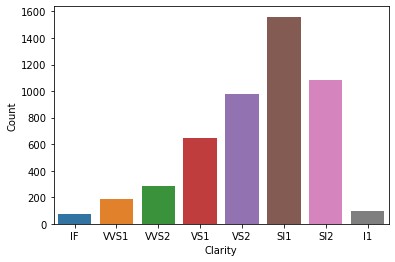

In [15]:
tmp = good.clarity.value_counts()
p = sns.barplot(x=tmp.index, y=tmp.values)
p.set(xlabel='Clarity', ylabel='Count');

As you can see most other categories are same but in *Good* cut diamonds, *SI1* is the most popular category where as in *Ideal* cut diamonds, *VS2* is the most popular category.

Lets compare both these distributions by plotting them together . . .

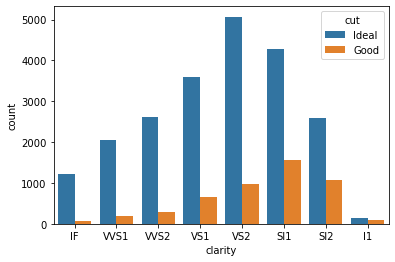

In [16]:
#collapse-hide
tmp1 = pd.DataFrame(ideal.clarity.value_counts())
tmp1.reset_index(inplace=True)
tmp1['cut'] = 'Ideal'
tmp1.columns = ['clarity', 'count', 'cut']

tmp2 = pd.DataFrame(good.clarity.value_counts())
tmp2.reset_index(inplace=True)
tmp2['cut'] = 'Good'
tmp2.columns = ['clarity', 'count', 'cut']

tmp = pd.concat([tmp1, tmp2])

sns.barplot(x=tmp.clarity, y=tmp['count'], hue=tmp.cut);

Huh 🤔, its pretty obvious that we have many more *Ideal* diamonds than *Good* diamonds. Its not a fair comparison, because of bigger sample size, *Ideal* diamonds are completely overshadowing the *Good* diamonds. 

For a fair comparison instead of comparing absolute frequency values, we should compare the percentage values.

## Probability Mass Functions (PMFs)

Count Plots are not good for comparing distributions. Hence we need to normalize them. These plots are know as **Probability Mass functions (PMFs)**.

Lets see how we can normalize our frequency tables to make PMF plots

In [17]:
ideal.clarity.value_counts()/len(ideal)

VS2     0.235302
SI1     0.198691
VS1     0.166535
VVS2    0.120922
SI2     0.120551
VVS1    0.094984
IF      0.056239
I1      0.006775
Name: clarity, dtype: float64

pretty simple, right? If you just divide your absolute values by total number of samples (i.e length of the corresponding dataframe) then you will get percentage values. 

The above table shows that 23.5% of *Ideal* cut diamond has *VS2* clarity.

Lets now try to plot these percentage values.

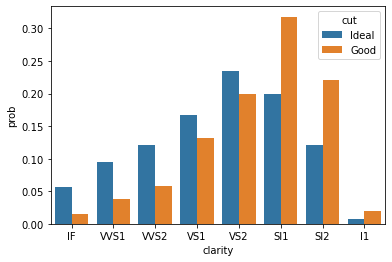

In [18]:
#collapse-hide
tmp1 = pd.DataFrame(ideal.clarity.value_counts()/len(ideal))
tmp1.reset_index(inplace=True)
tmp1['cut'] = 'Ideal'
tmp1.columns = ['clarity', 'prob', 'cut']

tmp2 = pd.DataFrame(good.clarity.value_counts()/len(good))
tmp2.reset_index(inplace=True)
tmp2['cut'] = 'Good'
tmp2.columns = ['clarity', 'prob', 'cut']

tmp = pd.concat([tmp1, tmp2])

sns.barplot(x=tmp.clarity, y=tmp.prob, hue=tmp.cut);

WOW! this is huge difference. Take a minute to compare both the plot. Can you spot the difference? Hint: look at y-axis.

Clearly, *SI1*, *SI2* and *I1* are more popular in *Good* diamonds than *Ideal* diamonds. This was not visible when we tried to compare them using absolute values. 

> Important: Whenever comparing two or more distributions make sure you **normalize** them before comparison.

Wonderful, now we know how to compare two distributions using bar plots. But we cannot use bar plot if we have a lot unique values or for continuous features.

For example, lets try to make a bar plot for *carat* feature

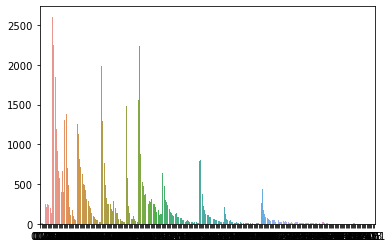

In [30]:
tmp = data.carat.value_counts()
sns.barplot(x=tmp.index, y=tmp.values);

The labels on the x-axis are not at all readable. There are so many small values that are hardly visible. Also, a lot of unique values make it difficult to understand the plot. We will see, how we can use histograms to alleviate this problem.

## Histogram

Instead of creating a separate bar for every unique value, we create bins for small ranges of values and put all the values in that range inside the bin. 

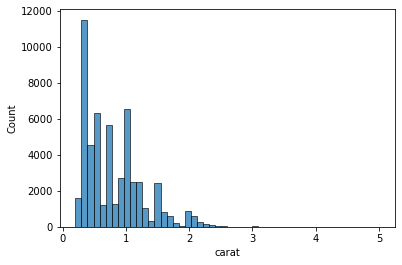

In [29]:
sns.histplot(data=data, x='carat', bins=50);

But histograms are not perfect. Changing the number of bins can result in drastically different plot. It can also obscure some meaningful insight from the data. Here is example

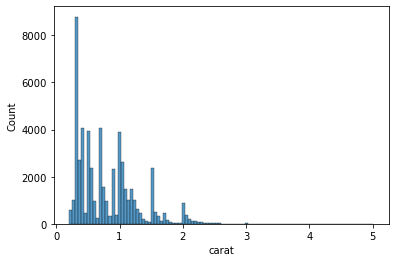

In [28]:
sns.histplot(data=data, x='carat', bins=100);

The plot will 100 bins looks very different from the one with 50 bins. 

Histograms works great when you well defined bins. For example: all age <18 is minor, >18 & <60 is adult, and >60 is senior citizen. In other cases, try to avoid them. 

## Probability Density Functions (PDFs)

For simplicity, you can think of PDFs are histograms with a lot of bins & then some smoothing to reduce the impact of missing values & noise.

### Technical Stuff (not important)
Technically, PDFs are derivatives of Cumulative Distribution Functions (CDFs). CDFs are nothing but cumulative sum of PMFs. 

In physics, Density of a substance is defined as mass per unit volume. No matter how the mass or volume changes, their ratio (i.e density) will always remain constant. Similarly, no matter how many data points you select from the distribution and the absolute values of these data points, the PDF will (more or less) look the same. 

Hence, PDF is a very apt name. Density is the way you summaries substances & also distributions. PDF is the standard way to describe any distribution.

---

PDFs are very expensive to compute & often times don't have real solutions. Kernel density estimation (KDE) is an algorithm that takes a sample and finds an appropriately smooth PDF that fits the data. You can read details at [wikipedia](http://en.wikipedia.org/wiki/Kernel_density_estimation).

Don't worry about all these technical details, you can easily make KDE plot using seaborn.

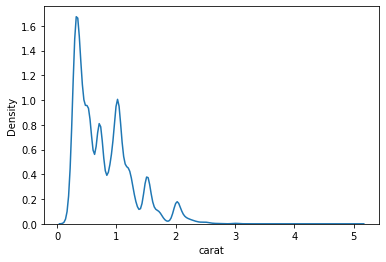

In [27]:
sns.kdeplot(data=data, x='carat');

In summary, you can always use KDE plots for continuous features & bar plot for categorical features. If you have well defines bins for continuous features then you can also use histograms.

## Thinks to look for in distributions

Often, we want to summarize the distribution with a few descriptive statistics. Some of the characteristics we might want to look for, are:
- **Central tendency**: Do the values tend to cluster around a particular point?
- **Modes**: Is there more than one cluster?
- **Spread**: How much variability is there in the values?
- **Tails**: How quickly do the probabilities drop off as we move away from the modes? **Skewness** is a property that describes the shape of a distribution. If the distribution is symmetric around its central tendency, it is **unskewed**. If the values extend farther to the right, it is **right skewed** and if the values extend left, it is **left skewed**.
- **Outliers**: Are there extreme values far from the modes? The best way to handle outliers depends on “domain knowledge”; that is, information about where the data come from and what they mean. And it depends on what analysis you are planning to perform

Statistics designed to answer these questions are called **summary statistics**.

Along with these plot, you can used other stats about the distribution like *mean*, *median*, *mode*, *min*, *max*, *25 & 75 percentile*, *Inter Quartile Range (IQR)*, etc to better understand & describe your distribution.

## Model Estimation

There are two types of distributions: empirical and analytic. 

The distributions we have used so far are called **empirical distributions** because they are based on empirical observations, which are necessarily finite samples.

On the contrary, **analytic distributions** are described by analytic mathematical function. Here are some popular analytic distributions : normal/guassian, log-normal, exponential, binomial, poisson, etc. Here is a [good blog](https://medium.com/analytics-vidhya/important-distributions-in-probability-statistics-a868283fa127) discussing some of these distributions in detail.

It turns out that many things we measure in the world have distributions that are well approximated by analytic distributions, so these distributions are sometimes good models for the real world. By "Model", I mean a simplified description of the world that is accurate enough for its intended purpose.

### Why model/estimate?

- Like all models, analytic distributions are abstractions, which means they leave out details that are considered irrelevant. For example, an observed distribution might have measurement errors or quirks that are specific to the sample; analytic models smooth out these idiosyncrasies.
- Analytic models are also a form of data compression. When a model fits a dataset well, a small set of parameters can summarize a large amount of data. For example, to describe a normal distribution, you only need two parameters: *mean* & *standard deviation*.
- A lot of study is already available for analytic distributions. For example, if you know your data follows normal distribution then you can easily tell the range in which 68.2% of your data will lay by looking at the image below.

![](https://miro.medium.com/max/875/1*b0vO_5fsIThnjrybUUnQyQ.png)

Hope you had a wonderful time reading this blog and also, you learned something useful. Cheers 🎉

## Further Reading
- [Seaborn Distributions tutorial](https://seaborn.pydata.org/tutorial/distributions.html) - Highly Recommended
- [Distributions in SciPy](https://www.johndcook.com/blog/distributions_scipy/)